In [2]:
import networkx as nx
import gurobipy as gb
from IPython.display import SVG


In [6]:
G = nx.gnp_random_graph(20,0.2, seed=10)

print(G.number_of_nodes())
print(G.number_of_edges())
print(nx.density(G))

print(G.degree())


20
35
0.18421052631578946
[(0, 2), (1, 4), (2, 5), (3, 6), (4, 2), (5, 4), (6, 7), (7, 1), (8, 2), (9, 5), (10, 6), (11, 1), (12, 4), (13, 5), (14, 3), (15, 4), (16, 3), (17, 1), (18, 1), (19, 4)]


In [7]:
%matplotlib inline

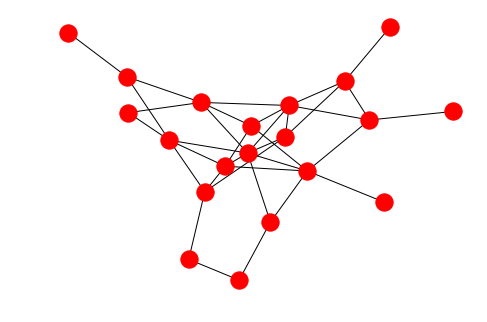

In [8]:
nx.draw_spring(G)

In [9]:

D = nx.nx_agraph.to_agraph(G)
D.node_attr.update (fontsize='8',  width=0.1, shape='circle')

#d.edge_attr.update(fontsize='10', arrowhead='vee', penwidth=0.2)
D.graph_attr.update(overlap='scale', sep='0.01')

#D.graph_attr.update(overlap='false', sep='3')

D.layout('neato')

D.draw('img.svg')
SVG('img.svg')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [11]:
G.number_of_nodes()


NameError: name 'x' is not defined

In [14]:
stableset = gb.Model()
x = stableset.addVars(G.number_of_nodes(), vtype=gb.GRB.BINARY, name='x')
stableset.setObjective(x.sum(),sense=gb.GRB.MAXIMIZE)


In [19]:
x[0]

<gurobi.Var x[0]>

In [20]:
stableset.addConstrs((x[i] + x[j] <= 1 for i,j in G.edges()), name='edge')
stableset.update()

for i in x:
    x[i].BranchPriority = G.degree(i)
    print x[i].Br

stableset.write('stableset.lp')

#stableset.Params.MIPFocus = 0
#stableset.Params.BranchDir = 1
#stableset.Params.VarBranch = 3

#stableset.Params.Heuristics = 0

In [19]:
stableset.optimize()

Optimize a model with 35 rows, 20 columns and 70 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 7.0000000
Presolve removed 22 rows and 8 columns
Presolve time: 0.00s
Presolved: 13 rows, 12 columns, 31 nonzeros
Variable types: 0 continuous, 12 integer (12 binary)

Root relaxation: objective 9.500000e+00, 7 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.50000    0    5    7.00000    9.50000  35.7%     -    0s
H    0     0                       9.0000000    9.50000  5.56%     -    0s

Explored 1 nodes (7 simplex iterations) in 0.03 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 9 7 

Optimal solution found (to

In [20]:
print('Obj: %g' % stableset.objVal)

print ()

for i in G.nodes():
    if (x[i].x > 1e-6):
        n = D.get_node(i)
        n.attr['color'] = 'red'
        n.attr['style'] = 'filled'
        n.attr['fontcolor'] = 'white'
        

D.draw('img.svg')

Obj: 9



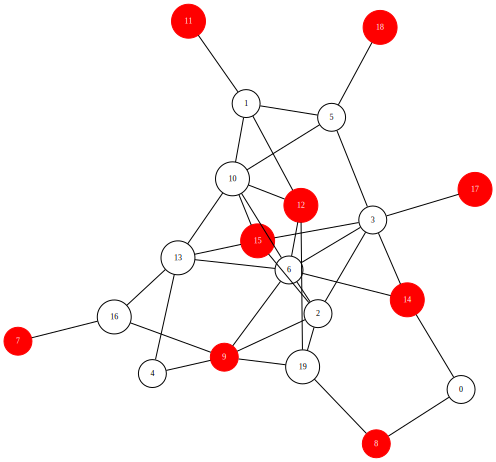

In [21]:
SVG('img.svg')